In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
from yolo_helper import get_YOLO_V2_NN

# Tipos de entrenamiento:
### Solo clasificación
### Cambiar tamaños de imagenes de entrada
### Todo completo
### Data augmentation
### Bajar LR 10 veces al final
### Cyclic Learning Rate

# Entrenamiento solo Classificación SIN aumentation

- 320x320
- Se entrena usando como loss solo la cross entropy apicada a las clases. El resto de las salidas (bounding box y confidence) se ignoran durante el entrenamiento
- Tiempo aprox por epoch con titanX: 20seg
- lr: 0.001
- Clases: 8

In [25]:
history = np.load('history_yolo_only_classif_NO_aumentation.npy').flat[0]

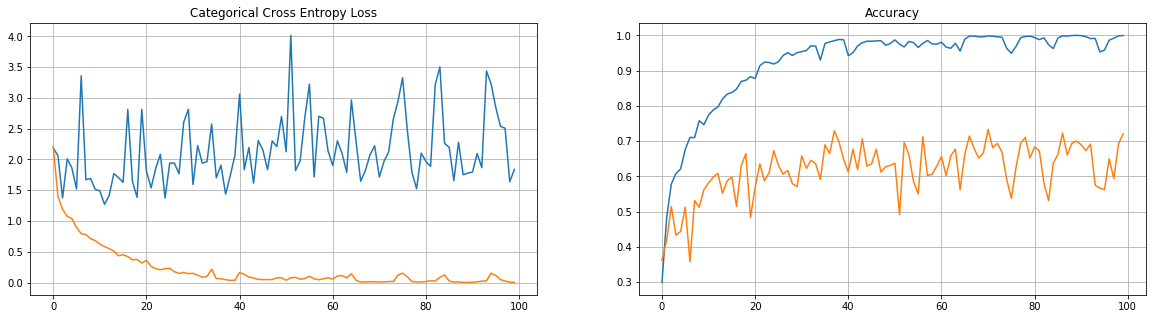

In [26]:
f, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(history['val_loss'])
ax[0].plot(history['loss'])
ax[0].set_title('Categorical Cross Entropy Loss')
ax[0].grid()
ax[1].plot(history['classes_acc'])
ax[1].plot(history['val_classes_acc'])
ax[1].set_title('Accuracy')
ax[1].grid()
plt.show()

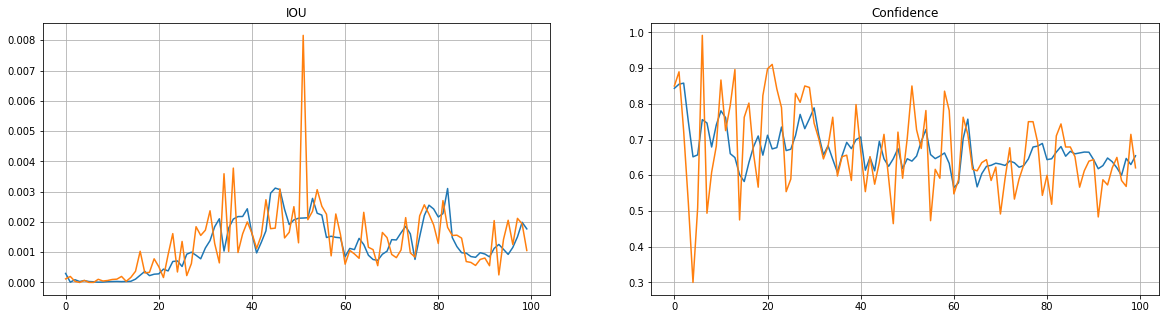

In [27]:
f, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(history['iou_metric'])
ax[0].plot(history['val_iou_metric'])
ax[0].set_title('IOU')
ax[0].grid()
ax[1].plot(history['confidence_acc_with_sigmoid'])
ax[1].plot(history['val_confidence_acc_with_sigmoid'])
ax[1].set_title('Confidence')
ax[1].grid()
plt.show()

# Entrenamiento solo Classificación con augmentation
- 320x320
- flip_hor, flip_ver, crop
- Se entrena usando como loss solo la cross entropy apicada a las clases. El resto de las salidas (bounding box y confidence) se ignoran durante el entrenamiento
- Tiempo aprox por epoch con titanX: 20seg
- lr: 0.001
- Clases: 8

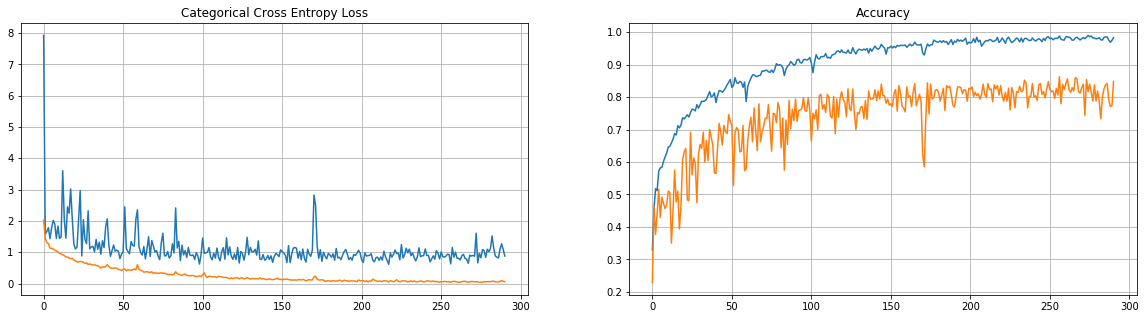

In [29]:
history_2 = np.load('history_yolo_only_classif_plus_aumentation.npy').flat[0]
f, ax = plt.subplots(1,2, figsize=(20,5))
ax[0].plot(history_2['val_loss'])
ax[0].plot(history_2['loss'])
ax[0].set_title('Categorical Cross Entropy Loss')
ax[0].grid()
ax[1].plot(history_2['classes_acc'])
ax[1].plot(history_2['val_classes_acc'])
ax[1].set_title('Accuracy')
ax[1].grid()
plt.show()

# Todo

- neg_confidence = 0.1
- el resto en 1

In [38]:
history_3 = np.load('history_yolo_loss_plus_aumentation.npy').flat[0]

In [44]:
history_3.keys()

dict_keys(['val_loss', 'val_negative_bin_cross_entropy_loss', 'val_classes_acc', 'val_confidence_acc_with_sigmoid', 'val_bounding_box_mse', 'val_iou_metric', 'val_positive_bin_cross_entropy_loss', 'val_categorical_cross_entropy_loss', 'loss', 'negative_bin_cross_entropy_loss', 'classes_acc', 'confidence_acc_with_sigmoid', 'bounding_box_mse', 'iou_metric', 'positive_bin_cross_entropy_loss', 'categorical_cross_entropy_loss'])

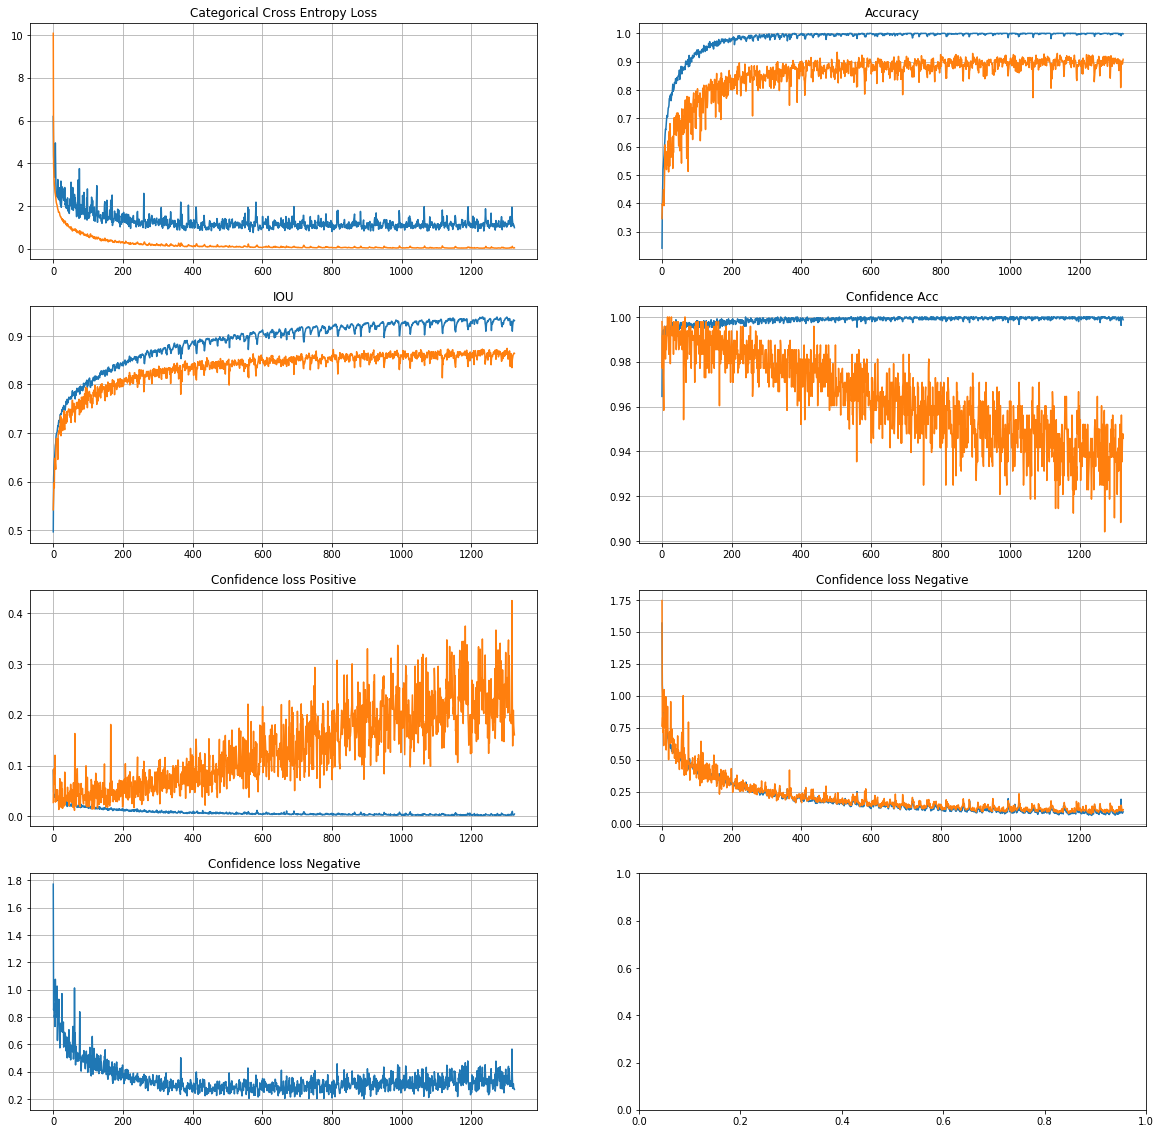

In [54]:
f, ax = plt.subplots(4,2, figsize=(20,20))
ax = ax.flatten()
ax[0].plot(history_3['val_loss'])
ax[0].plot(history_3['loss'])
ax[0].set_title('Categorical Cross Entropy Loss')
ax[0].grid()
ax[1].plot(history_3['classes_acc'])
ax[1].plot(history_3['val_classes_acc'])
ax[1].set_title('Accuracy')
ax[1].grid()
ax[2].plot(history_3['iou_metric'])
ax[2].plot(history_3['val_iou_metric'])
ax[2].set_title('IOU')
ax[2].grid()
ax[3].plot(history_3['confidence_acc_with_sigmoid'])
ax[3].plot(history_3['val_confidence_acc_with_sigmoid'])
ax[3].set_title('Confidence Acc')
ax[3].grid()
ax[4].plot(history_3['positive_bin_cross_entropy_loss'])
ax[4].plot(history_3['val_positive_bin_cross_entropy_loss'])
ax[4].set_title('Confidence loss Positive')
ax[4].grid()
ax[5].plot(history_3['negative_bin_cross_entropy_loss'])
ax[5].plot(history_3['val_negative_bin_cross_entropy_loss'])
ax[5].set_title('Confidence loss Negative')
ax[5].grid()
ax[6].plot(np.array(history_3['val_negative_bin_cross_entropy_loss']) + np.array(history_3['val_positive_bin_cross_entropy_loss']))
#ax[6].plot(history_3['val_negative_bin_cross_entropy_loss'])
ax[6].set_title('Confidence loss Negative')
ax[6].grid()
plt.show()


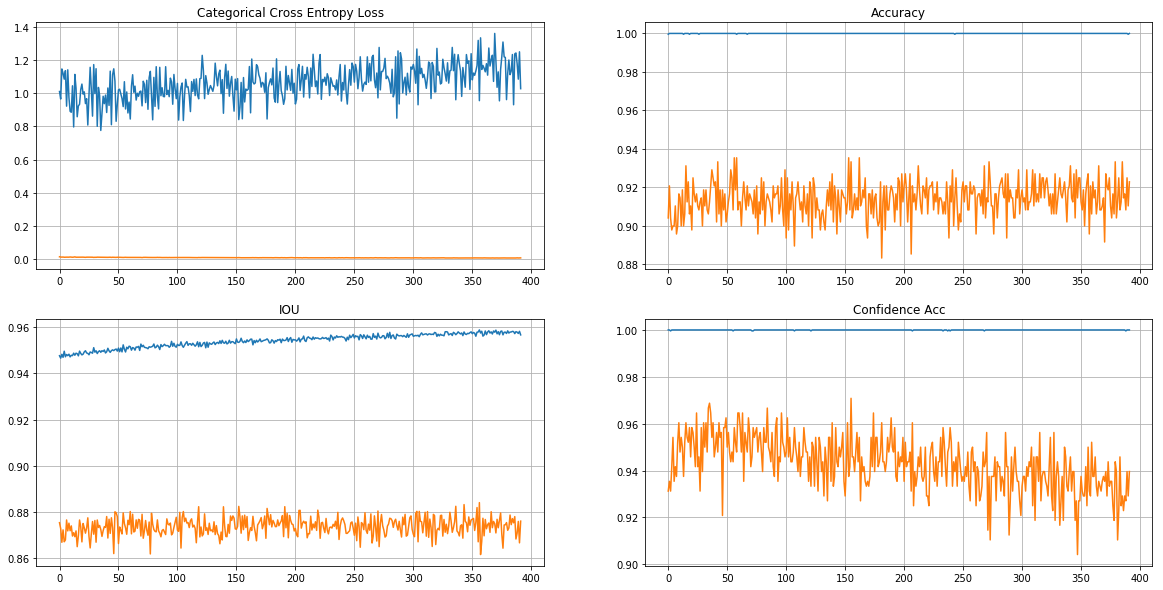

In [57]:
history_4 = np.load('history_yolo_loss_plus_aumentation_lambda_0.01.npy').flat[0]
f, ax = plt.subplots(2,2, figsize=(20,10))
ax = ax.flatten()
ax[0].plot(history_4['val_loss'])
ax[0].plot(history_4['loss'])
ax[0].set_title('Categorical Cross Entropy Loss')
ax[0].grid()
ax[1].plot(history_4['classes_acc'])
ax[1].plot(history_4['val_classes_acc'])
ax[1].set_title('Accuracy')
ax[1].grid()
ax[2].plot(history_4['iou_metric'])
ax[2].plot(history_4['val_iou_metric'])
ax[2].set_title('IOU')
ax[2].grid()
ax[3].plot(history_4['confidence_acc_with_sigmoid'])
ax[3].plot(history_4['val_confidence_acc_with_sigmoid'])
ax[3].set_title('Confidence Acc')
ax[3].grid()